<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Análisis-de-los-datos" data-toc-modified-id="Análisis-de-los-datos-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Análisis de los datos</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Análisis-previo-de-las-tablas" data-toc-modified-id="Análisis-previo-de-las-tablas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análisis previo de las tablas</a></span><ul class="toc-item"><li><span><a href="#Weekly-demand" data-toc-modified-id="Weekly-demand-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Weekly demand</a></span></li><li><span><a href="#center_info" data-toc-modified-id="center_info-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>center_info</a></span></li><li><span><a href="#Meal-Info" data-toc-modified-id="Meal-Info-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Meal Info</a></span></li></ul></li><li><span><a href="#Unir-Tablas" data-toc-modified-id="Unir-Tablas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Unir Tablas</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Contruct-Time-Series" data-toc-modified-id="Contruct-Time-Series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Contruct Time Series</a></span></li></ul></div>

## Análisis de los datos 

In [1]:
#Numpy & Pandas
import pandas as pd
import numpy as np

# Pandas options setting
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.float_format = '{:.3f}'.format

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import to_datetime

#datetime
from datetime import datetime

#SARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



## Import

In [2]:
meal_info = pd.read_csv('data/meal_info.csv', delimiter=',')

In [3]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [4]:
center_info = pd.read_csv('data/center_info.csv', delimiter=',')

In [5]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.700
1,13,590,56,TYPE_B,6.700
2,124,590,56,TYPE_C,4.000
3,66,648,34,TYPE_A,4.100
4,94,632,34,TYPE_C,3.600


In [6]:
weekly_demand = pd.read_csv('data/weekly_demand.csv', delimiter=',')

In [7]:
weekly_demand.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.830,152.290,0,0,177
1,1466964,1,55,1993,136.830,135.830,0,0,270
2,1346989,1,55,2539,134.860,135.860,0,0,189
3,1338232,1,55,2139,339.500,437.530,0,0,54
4,1448490,1,55,2631,243.500,242.500,0,0,40


## Análisis previo de las tablas

### Weekly demand

In [8]:
weekly_demand.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.830,152.290,0,0,177
1,1466964,1,55,1993,136.830,135.830,0,0,270
2,1346989,1,55,2539,134.860,135.860,0,0,189
3,1338232,1,55,2139,339.500,437.530,0,0,54
4,1448490,1,55,2631,243.500,242.500,0,0,40


In [9]:
weekly_demand.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.090,484.090,0,0,68
456544,1062036,145,61,2304,482.090,482.090,0,0,42
456545,1110849,145,61,2664,237.680,321.070,0,0,501
456546,1147725,145,61,2569,243.500,313.340,0,0,729
456547,1361984,145,61,2490,292.030,290.030,0,0,162


In [10]:
weekly_demand.shape

(456548, 9)

In [11]:
weekly_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


### center_info

In [12]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.700
1,13,590,56,TYPE_B,6.700
2,124,590,56,TYPE_C,4.000
3,66,648,34,TYPE_A,4.100
4,94,632,34,TYPE_C,3.600


In [13]:
center_info.tail()

,center_id,city_code,region_code,center_type,op_area
72,53,590,56,TYPE_A,3.800
73,30,604,56,TYPE_A,3.500
74,76,614,85,TYPE_A,3.000
75,68,676,34,TYPE_B,4.100
76,51,638,56,TYPE_A,7.000


In [14]:
center_info.shape

(77, 5)

In [15]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


### Meal Info

In [16]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [17]:
meal_info.tail()

,meal_id,category,cuisine
46,2956,Fish,Continental
47,2104,Fish,Continental
48,2444,Seafood,Continental
49,2867,Seafood,Continental
50,1445,Seafood,Continental


In [18]:
meal_info.shape

(51, 3)

In [19]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


## Unir Tablas

In [20]:
df = weekly_demand.copy()

In [21]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.830,152.290,0,0,177
1,1466964,1,55,1993,136.830,135.830,0,0,270
2,1346989,1,55,2539,134.860,135.860,0,0,189
3,1338232,1,55,2139,339.500,437.530,0,0,54
4,1448490,1,55,2631,243.500,242.500,0,0,40


In [22]:
df2 = df.merge(center_info, left_on='center_id', right_on='center_id')

In [23]:
df2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.830,152.290,0,0,177,647,56,TYPE_C,2.000
1,1466964,1,55,1993,136.830,135.830,0,0,270,647,56,TYPE_C,2.000
2,1346989,1,55,2539,134.860,135.860,0,0,189,647,56,TYPE_C,2.000
3,1338232,1,55,2139,339.500,437.530,0,0,54,647,56,TYPE_C,2.000
4,1448490,1,55,2631,243.500,242.500,0,0,40,647,56,TYPE_C,2.000


In [24]:
df3 = df2.merge(meal_info, left_on='meal_id', right_on='meal_id')

In [25]:
df3.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.830,152.290,0,0,177,647,56,TYPE_C,2.000,Beverages,Thai
1,1018704,2,55,1885,135.830,152.290,0,0,323,647,56,TYPE_C,2.000,Beverages,Thai
2,1196273,3,55,1885,132.920,133.920,0,0,96,647,56,TYPE_C,2.000,Beverages,Thai
3,1116527,4,55,1885,135.860,134.860,0,0,163,647,56,TYPE_C,2.000,Beverages,Thai
4,1343872,5,55,1885,146.500,147.500,0,0,215,647,56,TYPE_C,2.000,Beverages,Thai


## EDA

In [26]:
df3.center_id.unique()

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61])

In [27]:
c55_byweek = df3[df3['center_id'] == 55]
c55_byweek.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.830,152.290,0,0,177,647,56,TYPE_C,2.000,Beverages,Thai
1,1018704,2,55,1885,135.830,152.290,0,0,323,647,56,TYPE_C,2.000,Beverages,Thai
2,1196273,3,55,1885,132.920,133.920,0,0,96,647,56,TYPE_C,2.000,Beverages,Thai
3,1116527,4,55,1885,135.860,134.860,0,0,163,647,56,TYPE_C,2.000,Beverages,Thai
4,1343872,5,55,1885,146.500,147.500,0,0,215,647,56,TYPE_C,2.000,Beverages,Thai


In [28]:
c55_byweek = df[df['center_id'] == 55].groupby('week')[['checkout_price','base_price', 'emailer_for_promotion', 'homepage_featured','num_orders']].sum()


In [29]:
c55_byweek['center_id'] = 55

In [30]:
c55_byweek = c55_byweek.reset_index()

In [31]:
c55_byweek.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id
0,1,10967.900,11872.880,5,4,8382,55
1,2,10360.620,11269.390,6,4,6558,55
2,3,10476.990,11087.240,3,3,5005,55
3,4,11075.330,11580.820,0,3,6618,55
4,5,10158.560,11149.290,3,2,9138,55


In [32]:
c55_by_week_info = c55_byweek.merge(center_info, left_on='center_id', right_on='center_id')

In [33]:
c55_by_week_info

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id,city_code,region_code,center_type,op_area
0,1,10967.900,11872.880,5,4,8382,55,647,56,TYPE_C,2.000
1,2,10360.620,11269.390,6,4,6558,55,647,56,TYPE_C,2.000
2,3,10476.990,11087.240,3,3,5005,55,647,56,TYPE_C,2.000
3,4,11075.330,11580.820,0,3,6618,55,647,56,TYPE_C,2.000
4,5,10158.560,11149.290,3,2,9138,55,647,56,TYPE_C,2.000
5,6,10910.580,11851.570,0,2,6195,55,647,56,TYPE_C,2.000
6,7,9504.960,10004.390,1,1,5624,55,647,56,TYPE_C,2.000
7,8,8453.390,9131.570,0,1,3432,55,647,56,TYPE_C,2.000
8,9,10697.120,11761.210,2,0,5445,55,647,56,TYPE_C,2.000
9,10,11036.680,12015.440,5,1,5633,55,647,56,TYPE_C,2.000


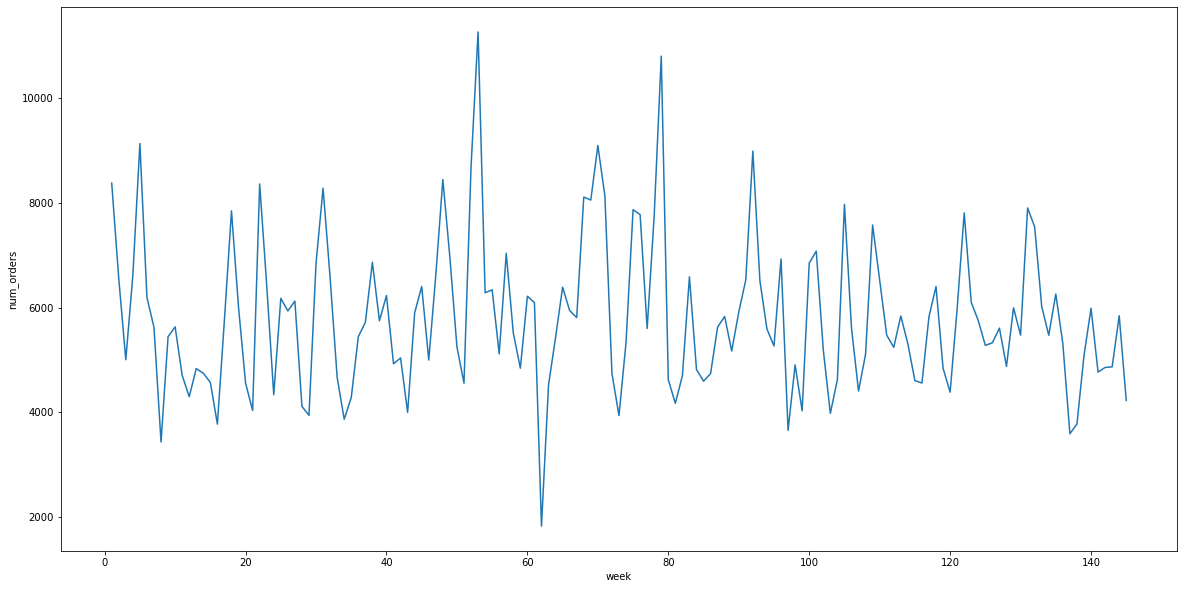

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=c55_by_week_info, x='week', y='num_orders')
plt.show()

In [35]:
def convert_week(mum_week):
    if mum_week <= 52:
        return mum_week
    elif 52 < mum_week <= 104:
         return mum_week-52
    else:
        return mum_week-104

In [36]:
c55_by_week_info['year_week'] = c55_by_week_info['week'].apply(convert_week)

In [37]:
def convert_week_ts(mum_week):
    if mum_week <= 52:
        return f'2020-{mum_week}'
    elif 52 < mum_week <= 104:
         return f'2021-{mum_week-52}'
    else:
        return f'2022-{mum_week-104}'

In [38]:
c55_by_week_info['year_week_ts'] = c55_by_week_info['week'].apply(convert_week_ts)

In [39]:
c55_by_week_info.tail()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id,city_code,region_code,center_type,op_area,year_week,year_week_ts
140,141,12223.320,12880.650,3,0,4769,55,647,56,TYPE_C,2.000,37,2022-37
141,142,10391.720,10996.910,3,0,4857,55,647,56,TYPE_C,2.000,38,2022-38
142,143,12431.600,13435.820,1,0,4869,55,647,56,TYPE_C,2.000,39,2022-39
143,144,12566.250,13624.730,5,0,5846,55,647,56,TYPE_C,2.000,40,2022-40
144,145,12139.570,12338.450,0,0,4227,55,647,56,TYPE_C,2.000,41,2022-41


In [40]:
def convert_week(mum_week):
    if mum_week <= 52:
        return mum_week
    elif 52 < mum_week <= 104:
         return mum_week-52
    else:
        return mum_week-104

In [41]:
c55_by_week_info['year_week'] = c55_by_week_info['week'].apply(convert_week)

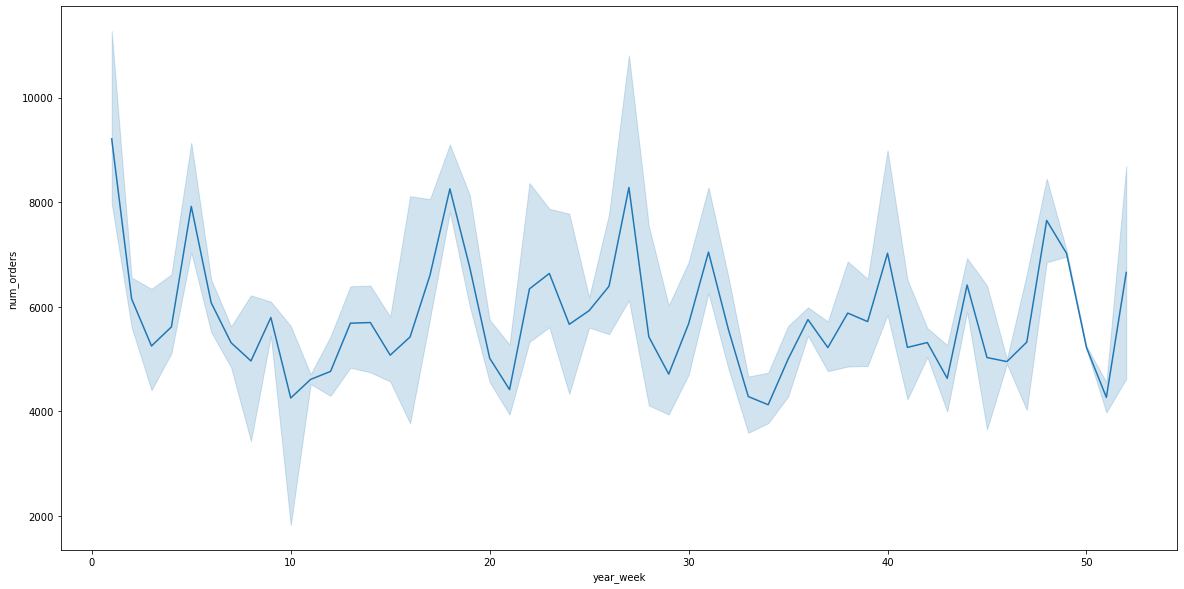

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=c55_by_week_info, x='year_week', y='num_orders')
plt.show()

## Contruct Time Series

In [43]:
df_timeseries = c55_by_week_info[['year_week_ts', 'num_orders']]

In [44]:
df_timeseries

,year_week_ts,num_orders
0,2020-1,8382
1,2020-2,6558
2,2020-3,5005
3,2020-4,6618
4,2020-5,9138
5,2020-6,6195
6,2020-7,5624
7,2020-8,3432
8,2020-9,5445
9,2020-10,5633


In [45]:
df_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year_week_ts  145 non-null    object
 1   num_orders    145 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [46]:
def week_to_date(d):
    import datetime   
    d = str(d)
    return datetime.datetime.strptime(d + '-1', "%Y-%W-%w")


In [47]:
df_timeseries['fecha'] = c55_by_week_info['year_week_ts'].apply(week_to_date)

/var/folders/y8/ypjvwqqx09s0szf2lsykq5vh0000gn/T/ipykernel_12559/705911645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['fecha'] = c55_by_week_info['year_week_ts'].apply(week_to_date)


In [48]:
df_timeseries.head()

,year_week_ts,num_orders,fecha
0,2020-1,8382,2020-01-06
1,2020-2,6558,2020-01-13
2,2020-3,5005,2020-01-20
3,2020-4,6618,2020-01-27
4,2020-5,9138,2020-02-03


In [49]:
df_timeseries.tail()

,year_week_ts,num_orders,fecha
140,2022-37,4769,2022-09-12
141,2022-38,4857,2022-09-19
142,2022-39,4869,2022-09-26
143,2022-40,5846,2022-10-03
144,2022-41,4227,2022-10-10


In [50]:
plt.rcParams['figure.figsize'] = (12,8)

In [51]:
df_timeseries = df_timeseries.drop('year_week_ts', axis=1)

In [52]:
df_timeseries = df_timeseries.set_index('fecha')

In [113]:
df_timeseries

,num_orders
fecha,
2020-01-06,8382
2020-01-13,6558
2020-01-20,5005
2020-01-27,6618
2020-02-03,9138
2020-02-10,6195
2020-02-17,5624
2020-02-24,3432
2020-03-02,5445


<AxesSubplot:xlabel='fecha'>

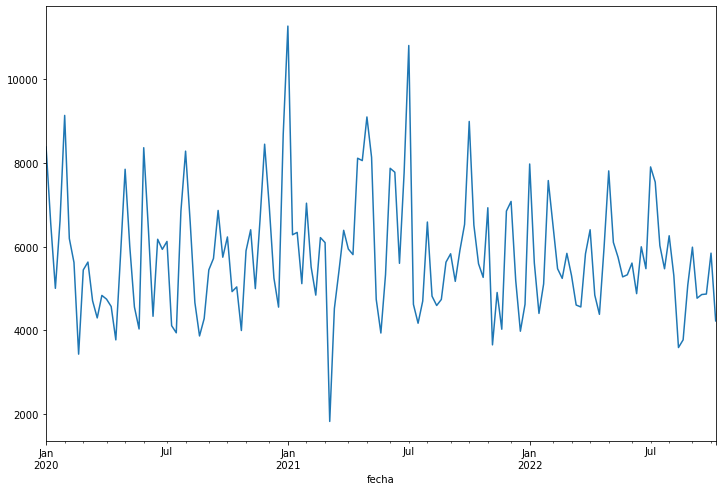

In [54]:
df_timeseries['num_orders'].plot()

In [55]:
decomposition = seasonal_decompose(df_timeseries)

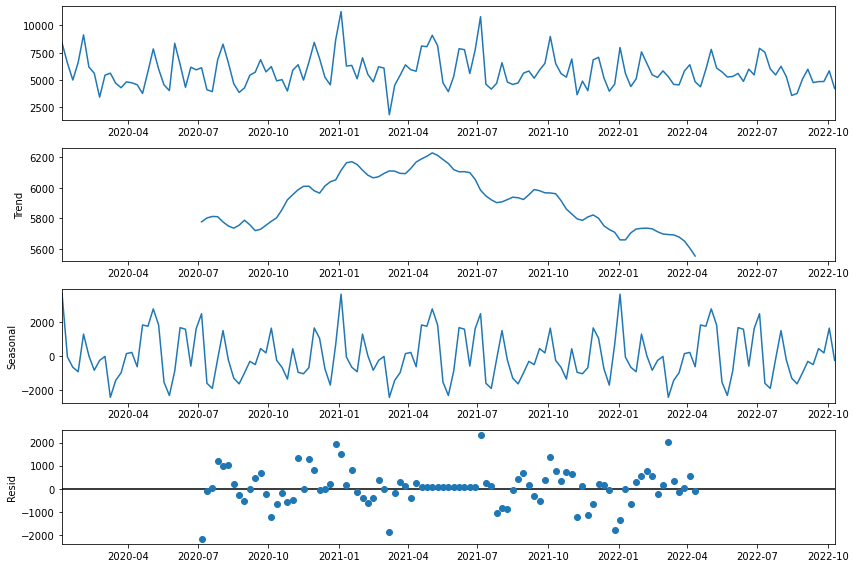

In [56]:
_ = decomposition.plot()

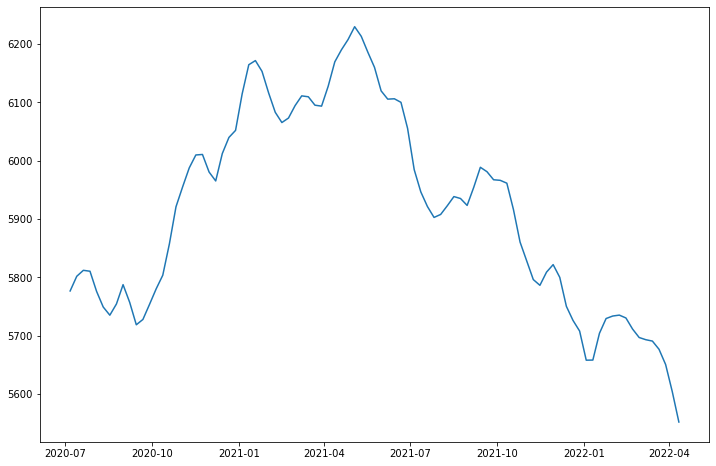

In [57]:
plt.plot(decomposition.trend)
plt.show()

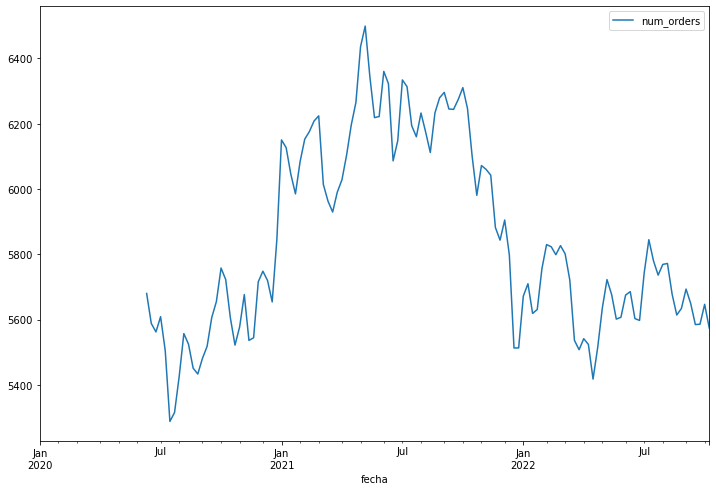

In [58]:
df_timeseries.rolling(24).mean().plot()
plt.show()

<AxesSubplot:xlabel='fecha'>

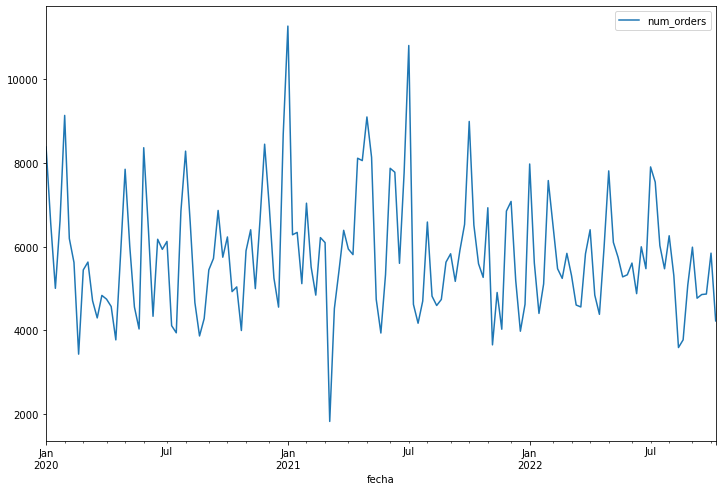

In [59]:
df_timeseries.plot()

In [60]:
adfuller(df_timeseries)

(-3.480924562035846,
 0.008490721132828992,
 13,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 2232.7523475311355)

Test statistic:-3.480924562035844

P-value: 0.00849072113282902

The time series is stationary

In [112]:
model = SARIMAX(df_timeseries,order=(2,1,2),seasonal_order=(2,1,2,12), freq='W-MON')

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [62]:
results = model.fit(maxiter=100)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16081D+00    |proj g|=  1.72535D-01

At iterate    5    f=  8.09134D+00    |proj g|=  1.55784D-02

At iterate   10    f=  8.08663D+00    |proj g|=  1.46031D-02

At iterate   15    f=  8.08500D+00    |proj g|=  8.50866D-04

At iterate   20    f=  8.08490D+00    |proj g|=  7.40894D-04

At iterate   25    f=  8.08488D+00    |proj g|=  8.09816D-04

At iterate   30    f=  8.08290D+00    |proj g|=  8.32529D-03

At iterate   35    f=  8.04850D+00    |proj g|=  7.07969D-02

At iterate   40    f=  8.00194D+00    |proj g|=  2.95201D-02

At iterate   45    f=  7.98619D+00    |proj g|=  1.06115D-01

At iterate   50    f=  7.96323D+00    |proj g|=  5.81974D-03

At iterate   55    f=  7.96292D+00    |proj g|=  7.64300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         num_orders   No. Observations:                  145
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1154.624
Date:                            Fri, 25 Nov 2022   AIC                           2327.247
Time:                                    12:49:33   BIC                           2353.193
Sample:                                01-06-2020   HQIC                          2337.790
                                     - 10-10-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3157      0.272      1.159      0.246      -0.218       0.849
ar.L2         -0.3166      0.146     -2.168      0.030      -0.603      -0.030
ma.L1         -0.8458      0.285     -2.968      0.003      -1.404      -0.287
ma.L2         -0.0900      0.284     -0.317      0.751      -0.646       0.466
ar.S.L12      -1.0975      0.218     -5.027      0.000      -1.525      -0.670
ar.S.L24      -0.0977      0.144     -0.678      0.498      -0.380       0.185
ma.S.L12       0.0118      3.026      0.004      0.997      -5.919       5.943
ma.S.L24      -0.9881      0.153     -6.475      0.000      -1.287      -0.689
sigma2      1.854e+06   1.85e-06      1e+12      0.000    1.85e+06    1.85e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.98   Prob(JB):                         0.49
Heteroskedasticity (H):               0.58   Skew:                             0.25
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+28. Standard errors may be unstable.
"""

In [64]:
df_timeseries.tail()

,num_orders
fecha,
2022-09-12,4769
2022-09-19,4857
2022-09-26,4869
2022-10-03,5846
2022-10-10,4227


<AxesSubplot:>

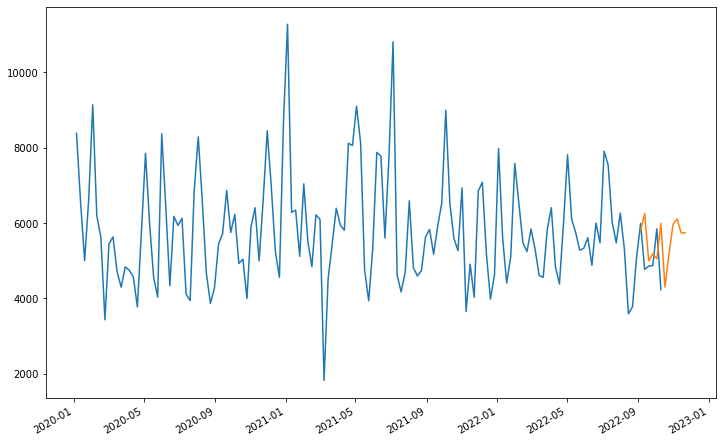

In [65]:
plt.plot(df_timeseries)
results.get_prediction(start='2022-09-05', end='2022-11-17').predicted_mean.plot()

In [66]:
results.get_prediction(start='2022-10-17', end='2022-11-17').predicted_mean

2022-10-17   4300.835
2022-10-24   5178.978
2022-10-31   5968.272
2022-11-07   6109.792
2022-11-14   5737.838
2022-11-21   5741.318
Freq: W-MON, Name: predicted_mean, dtype: float64

In [67]:
from pmdarima.arima import auto_arima

In [94]:
model = auto_arima(df_timeseries, trace=True, statonary=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2504.695, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2528.391, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2514.763, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2507.264, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2935.503, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2510.832, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2506.378, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2503.814, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2504.814, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2495.687, Time=0.16 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=2497.217, Time=0.25 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=2496.194, Time=0.79 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=2498.430, Time=0.12 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : 

In [95]:
pred = model.predict(n_periods=12)

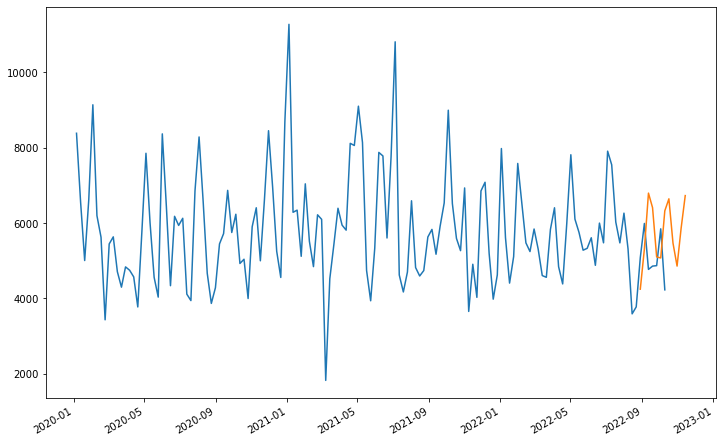

In [96]:
plt.plot(df_timeseries)
pd.Series(pred, 
          index=pd.date_range(start='2022-08-29', 
                              end='2022-11-17', 
                              freq='W-MON')).plot()
plt.show()

In [97]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_timeseries)

(0.01, False)

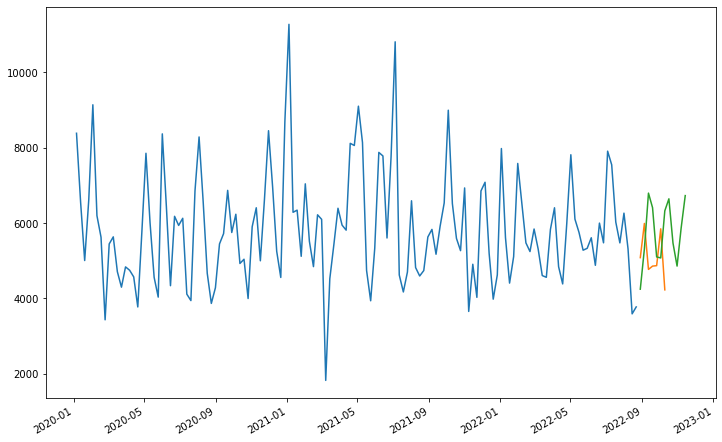

In [109]:
train = df_timeseries[:-7]
test = df_timeseries[-7:]

plt.plot(train)
plt.plot(test)
pd.Series(pred, 
          index=pd.date_range(start='2022-08-29', 
                              end='2022-11-17', 
                              freq='W-MON')).plot()
plt.show()

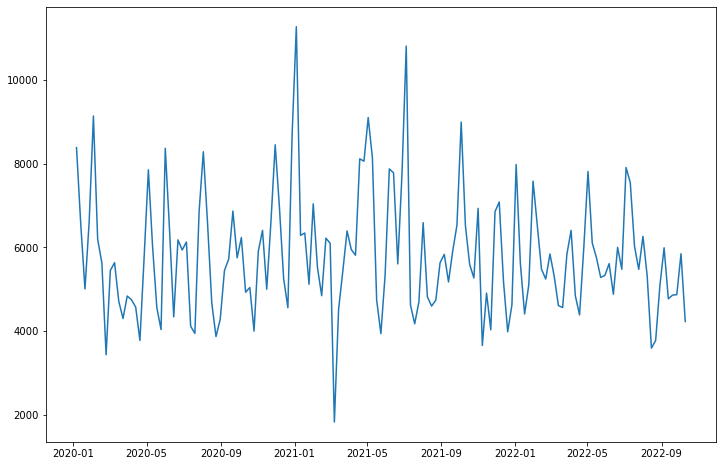

In [110]:
plt.plot(df_timeseries)